In [26]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# order: west africa, gobi desert, west india, north africa, arabian desert
obs_paths = ['../EMIT-scenes/west_africa_scene/emit20230321t150833_o08010_s000_l1b_obs_b0106_v01.hdr', 
             '../EMIT-scenes/gobi_desert_scene/EMIT_L1B_OBS_001_20230603T080502_2315406_055_obs.hdr', 
            '../EMIT-scenes/west_india_scene/EMIT_L1B_OBS_001_20230217T094600_2304806_029_obs.hdr', 
            '../EMIT-scenes/north_africa_scene/EMIT_L1B_OBS_001_20230214T133958_2304509_008_obs.hdr',
            '../EMIT-scenes/arabian_desert_scene/EMIT_L1B_OBS_001_20230424T091202_2311406_031_obs.hdr']
rad_paths = ['../EMIT-scenes/west_africa_scene/EMIT_L1B_RAD_001_20230321T150833_2308010_003_radiance.hdr', 
             '../EMIT-scenes/gobi_desert_scene/EMIT_L1B_RAD_001_20230603T080502_2315406_055_radiance.hdr', 
            '../EMIT-scenes/west_india_scene/EMIT_L1B_RAD_001_20230217T094600_2304806_029_radiance.hdr', 
            '../EMIT-scenes/north_africa_scene/EMIT_L1B_RAD_001_20230214T133958_2304509_008_radiance.hdr',
            '../EMIT-scenes/arabian_desert_scene/EMIT_L1B_RAD_001_20230424T091202_2311406_031_radiance.hdr']
mask_paths = ['../EMIT-scenes/west_africa_scene/EMIT_L2A_MASK_001_20230321T150833_2308010_003_mask.hdr', 
             '../EMIT-scenes/gobi_desert_scene/EMIT_L2A_MASK_001_20230603T080502_2315406_055_mask.hdr', 
            '../EMIT-scenes/west_india_scene/EMIT_L2A_MASK_001_20230217T094600_2304806_029_mask.hdr',  
            '../EMIT-scenes/north_africa_scene/EMIT_L2A_MASK_001_20230214T133958_2304509_008_mask.hdr',
            '../EMIT-scenes/arabian_desert_scene/EMIT_L2A_MASK_001_20230424T091202_2311406_031_mask.hdr']

paths = []
paths.append(obs_paths)
paths.append(rad_paths)
paths.append(mask_paths)


west_africa_paths = []
gobi_desert_paths = []
west_india_paths = []
north_africa_paths = []
arabian_desert_paths = []

scene_paths = []
scene_paths.append(west_africa_paths)
scene_paths.append(gobi_desert_paths)
scene_paths.append(west_india_paths)
scene_paths.append(north_africa_paths)
scene_paths.append(arabian_desert_paths)


for i in range(5):
    for j in range(3):
        scene_paths[i].append(paths[j][i])    

import preprocess
import time

TOA_refls = []
irr_path = '../irr.npy'

start_time = time.time()
for i in range(5):
    print('scene: ', i)
    TOA_refl = preprocess.convert_rad(scene_paths[i], irr_path)
    TOA_refls.append(TOA_refl)
    
end_time = time.time()
elapsed = end_time - start_time
print('Executed in: ', elapsed, ' seconds')

scene:  0


C:\Users\vpatro\AppData\Local\anaconda3\envs\isofit_env\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


scene:  1
scene:  2
scene:  3
scene:  4
Executed in:  38.968324422836304  seconds


In [12]:
for i in range(len(TOA_refls)):
    TOA_refls[i] = TOA_refls[i].reshape((TOA_refls[i].shape[0]*TOA_refls[i].shape[1], TOA_refls[i].shape[2]))

In [14]:
data = np.concatenate((TOA_refls[0], TOA_refls[1], TOA_refls[2], TOA_refls[3], TOA_refls[4]))

In [15]:
data.shape

(8068032, 285)

In [31]:
indices = np.random.randint(0, 8068032, 500000)
data_05M = data[indices]

In [16]:
indices = np.random.randint(0, 8068032, 1000000)
data_1M = data[indices]

In [17]:
data.shape

(8068032, 285)

In [18]:
indices = np.random.randint(0, 8068032, 4000000)
data_5M = data[indices]

In [19]:
data_5M.shape

(4000000, 285)

In [22]:
seed = 8
start_time = time.time()
kmeans_1M = KMeans(init = 'k-means++', n_clusters = 8, random_state = seed).fit(data_1M)
end_time = time.time()
elapsed_1M = (end_time - start_time) / 60

C:\Users\vpatro\AppData\Local\anaconda3\envs\isofit_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
seed = 8
start_time = time.time()
kmeans_1M = KMeans(init = 'k-means++', n_clusters = 8, random_state = seed).fit(data_5M)
end_time = time.time()
elapsed_4M = (end_time - start_time) / 60

C:\Users\vpatro\AppData\Local\anaconda3\envs\isofit_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
seed = 8
start_time = time.time()
kmeans_1M = KMeans(init = 'k-means++', n_clusters = 8, random_state = seed).fit(data_05M)
end_time = time.time()
elapsed_05M = (end_time - start_time) / 60

C:\Users\vpatro\AppData\Local\anaconda3\envs\isofit_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
times = np.zeros(3)
times[0] = elapsed_05M
times[1] = elapsed_1M
times[2] = elapsed_4M
num_samples = np.zeros(3)
num_samples[0] = 500000
num_samples[1] = 1000000
num_samples[2] = 4000000

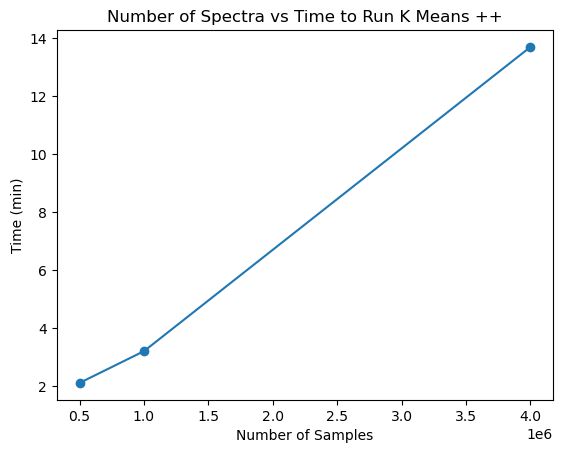

In [35]:
%matplotlib inline
plt.plot(num_samples, times, linestyle='-', marker='o')
plt.xlabel('Number of Samples')
plt.ylabel('Time (min)')
plt.title('Number of Spectra vs Time to Run K Means ++')
plt.show()